<a href="https://colab.research.google.com/github/AshwathiE/PRODIGY_DS/blob/main/Task2ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def load_data(file_path):
    """Load Excel data into a DataFrame."""
    return pd.read_excel("/content/population.xls")

In [3]:

def rename_columns(df):
    """Rename specific columns for better readability."""
    df.rename(columns={
        'Unnamed: 5': 'Population age composition2',
        'Unnamed: 6': 'Population age composition3'
    }, inplace=True)
    return df


In [4]:
def print_unique_values(df, columns):
    """Print unique values of specified columns."""
    for col in columns:
        print(f"Unique values in '{col}': {df[col].unique()}")

In [6]:
def convert_to_numeric(df, columns):
    """Convert specified columns to numeric, with non-numeric values coerced to NaN."""
    df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')
    return df

In [7]:
def fill_missing_values_with_median(df, columns):
    """Fill missing values in specified columns with the median of each column."""
    for col in columns:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
    return df

In [8]:
def create_grouped_df(df, original_cols, new_cols):
    """Create a new DataFrame with renamed columns for age categories."""
    df_grouped = df[original_cols].copy()
    df_grouped.columns = new_cols
    return df_grouped

In [9]:
def plot_age_distribution(total_population, categories):
    """Plot a bar chart for age distribution."""
    plt.figure(figsize=(8, 6))
    plt.bar(categories, total_population, color='cyan', edgecolor='black')
    plt.xlabel('Age Category')
    plt.ylabel('Population Count')
    plt.title('Bar Chart for Age Distribution of Population (2022)')
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          274 non-null    object
 1   Population                          228 non-null    object
 2   Unnamed: 2                          227 non-null    object
 3   Average annual population growth %  227 non-null    object
 4   Population age composition          229 non-null    object
 5   Unnamed: 5                          229 non-null    object
 6   Unnamed: 6                          229 non-null    object
 7   Dependency ratio                    229 non-null    object
 8   Unnamed: 8                          229 non-null    object
 9   Crude death rate                    228 non-null    object
 10  Crude birth rate                    228 non-null    object
dtypes: object(11)
memory usage: 25.9+ KB
Index(['Unnamed: 0', 

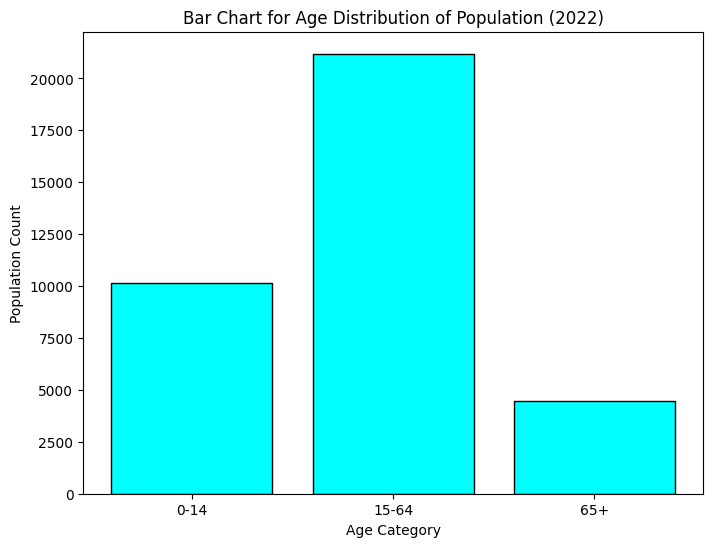

In [10]:
def main():
    file_path = "/content/Population Dynamics (World Development Report).xls"

    # Load data
    df = load_data(file_path)
    df.info()
    print(df.columns)

    # Rename columns
    df = rename_columns(df)

    # Print unique values
    age_cols = ['Population age composition', 'Population age composition2', 'Population age composition3']
    print_unique_values(df, age_cols)

    # Convert columns to numeric
    df = convert_to_numeric(df, age_cols)

    # Fill missing values with median
    df = fill_missing_values_with_median(df, age_cols)

    # Define age categories
    age_categories = ['0-14', '15-64', '65+']

    # Create grouped DataFrame
    df_grouped = create_grouped_df(df, age_cols, age_categories)

    # Calculate the sum of each age category
    total_population = df_grouped.sum()

    # Plot age distribution
    plot_age_distribution(total_population, age_categories)

if __name__ == "__main__":
    main()